# Hand Detection

Computer Vision project UniPD, 2022.

Group: Grotto Gionata, Mosco Simone, Pisacreta Giulia.

Packages required

In [ ]:
import os
import cv2
import scipy.io
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

#mat files
!pip install mat4py
from mat4py import loadmat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Download Dataset

The dataset (https://www.robots.ox.ac.uk/~vgg/data/hands/) wiil be placed in the *dataset* folder and it has the following structure:

dataset
- training_dataset
  * training_data
    - annotations
    - images
- test_dataset
  * test_data
    - annotations
    - images
- validation_dataset
  * validation_data
    - annotations
    - images


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#create folder
!mkdir /content/dataset

#unzip into new folder folder
!tar -xzvf '/content/drive/MyDrive/hand_dataset.tar.gz' -C '/content/dataset'

### Import Dataset
Import the three Train, Test and Validation dataset

In [ ]:
#function to load a dataset from its directory
def load_dataset(path):
  data = []
  images_path = os.path.join(path, 'images')
  annotations_path = os.path.join(path, 'annotations')

  for img_name in os.listdir(images_path):
    ann_name = img_name[:-3] + 'mat'
    try:
      #get image
      img = cv2.imread(os.path.join(images_path, img_name))
      #convert to rgb
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      #TODO: resize image (?)

      #get annotations and convert it
      boxes = loadmat(os.path.join(annotations_path, ann_name))['boxes']
      if type(boxes) == list:
        annotations = [list(box.values())[:4] for box in boxes]
      elif type(boxes) == dict:
        annotations = list(boxes.values())[:4]
      data.append([img, annotations])
    except Exception as e:
      print(e)
  return np.array(data)


#path of the datasets
data_dir = Path('/content/dataset/hand_dataset')
train_dir = os.path.join(data_dir, 'training_dataset/training_data')
val_dir = os.path.join(data_dir, 'validation_dataset/validation_data')
test_dir = os.path.join(data_dir, 'test_dataset/test_data')

train_dataset = load_dataset(train_dir)
val_dataset = load_dataset(val_dir)
test_dataset = load_dataset(test_dir)

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



Visualize a sample and its annoatations

In [ ]:
print('Annotations: ')
print(train_dataset[0][1])

Annotations: 
[[432.4696414195462, 255.7352770848963], [410.2503585804542, 272.9047229151038], [445.61035858045415, 318.66472291510377], [467.8296414195462, 301.4952770848963]]


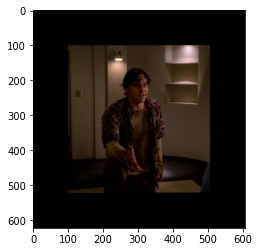

In [ ]:
plt.imshow(train_dataset[0][0])

In [ ]:
def draw_boxes(img, boxes):
  image = img.copy()
  color = (0, 255, 0)
  #case where only a hand is present in the image
  if len(boxes[0]) == 2:
    #four points
    point1 = (int(boxes[0][1]), int(boxes[0][0]))
    point2 = (int(boxes[1][1]), int(boxes[1][0]))
    point3 = (int(boxes[2][1]), int(boxes[2][0]))
    point4 = (int(boxes[3][1]), int(boxes[3][0]))
    image = cv2.line(img, point1, point2, color, 2)
    image = cv2.line(img, point1, point4, color, 2)
    image = cv2.line(img, point3, point2, color, 2)
    image = cv2.line(img, point3, point4, color, 2)
  else:
    for box in boxes:
      #four points
      point1 = (int(box[0][1]), int(box[0][0]))
      point2 = (int(box[1][1]), int(box[1][0]))
      point3 = (int(box[2][1]), int(box[2][0]))
      point4 = (int(box[3][1]), int(box[3][0]))
      image = cv2.line(img, point1, point2, color, 2)
      image = cv2.line(img, point1, point4, color, 2)
      image = cv2.line(img, point3, point2, color, 2)
      image = cv2.line(img, point3, point4, color, 2)

  plt.imshow(image)

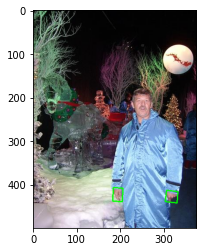

In [ ]:
draw_boxes(train_dataset[60][0], train_dataset[60][1])

In [ ]:
print(train_dataset[60][1])

[[[407.4499231463027, 183.20429076192332], [408.09256051382795, 205.1949027864637], [439.1383121478149, 204.28764472194757], [438.4956747802896, 182.2970326974072]], [[413.7262819792466, 305.0665217501966], [416.52208403382525, 331.92138147560973], [442.6658748834984, 329.1996072820614], [439.8700728289198, 302.34474755664826]]]


**Dataset Structure**

    dataset[0] = image and annotations
    dataset[0][0] = iamge
    dataset[0][1] = annotations

### Preprocessing

(375, 500)
Bounding box:  [[[162.55803156685815, 44.01635812428851], [126.9106000120892, 32.31529164529672], [109.90381638635819, 61.459181046218376], [145.55124794112717, 73.16024752521017]], [[216.07596237359246, 32.78809188914411], [239.20880955623204, 49.463410415003324], [268.97068090126123, 26.239373548643893], [245.83783371862168, 9.56405502278468]], [[152.32769665702412, 128.51945505883737], [161.56123901549054, 116.55512558632392], [129.54576922991552, 102.65680300567877], [120.3122268714491, 114.6211324781922]], [[195.488745692094, 167.53838658244226], [219.65841999991386, 187.03812954658997], [251.6738897854889, 164.7165811594932], [227.50421547766908, 145.2168381953455]], [[72.24797017847756, 251.98939730977864], [84.9789460008596, 241.99268563953015], [65.43910974354965, 227.99526628469144], [52.70813392116761, 237.99197795493993]]]


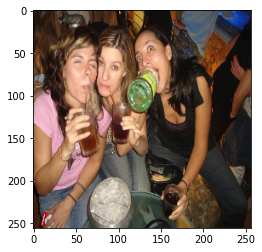

In [ ]:
image = train_dataset[170][0]
boxes = train_dataset[170][1]
shape = image.shape[:2]
print(shape)

resized = cv2.resize(image, (256, 256))

new_bbox = []
#case with only one hand
if len(boxes[0]) == 2:
  for point in boxes:
    new_bbox.append([point[0]*256/shape[0], point[1]*256/shape[1]])
else:
  for box in boxes:
    single_box = []
    for point in box:
      single_box.append([point[0]*256/shape[0], point[1]*256/shape[1]])
    new_bbox.append(single_box)

print('Bounding box: ', new_bbox)

#plt.imshow(image)
plt.imshow(resized)

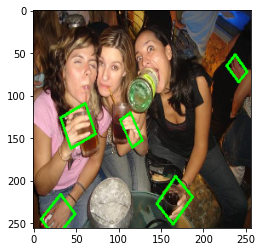

In [ ]:
draw_boxes(resized, new_bbox)

### Model

In [ ]:
train_set = []
for sample in train_dataset:
  if len(sample[1][0]) == 2:
    resized = cv2.resize(sample[0], (256, 256))
    boxes = sample[1]

    new_bbox = []
    for point in boxes:
      new_bbox.append([point[0]*256/shape[0], point[1]*256/shape[1]])
    train_set.append([resized, new_bbox])
train_set = np.array(train_set)

print('New shape (images with only one hand): ', train_set.shape)
print('Shape of image: ', train_set[10][0].shape)

New shape (images with only one hand):  (1328, 2)
Shape of image:  (256, 256, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()
